In [1]:
import backtesting_framework as bf
import momentum_strategy
import pandas as pd
import datetime

### 讀取資料

In [10]:
datas_table = pd.read_csv('(2010-2021)stock_price.csv', index_col=0, header=[0,1], parse_dates=True)
datas_table.head(2)

AAPL US Equity                                              \
                    CLOSE      HIGH       LOW      OPEN        VOLUME   
2010-01-04       7.649278  7.660707  7.586421  7.626778  1.525399e+08   
2010-01-05       7.656421  7.699635  7.616421  7.671064  1.704628e+08   

           NFLX US Equity                                              ...  \
                    CLOSE      HIGH       LOW      OPEN        VOLUME  ...   
2010-01-04       7.639992  7.944278  7.565707  7.887135  6.048363e+06  ...   
2010-01-05       7.358564  7.652849  7.258564  7.652849  6.669432e+06  ...   

           GE US Equity                                                 \
                  CLOSE        HIGH         LOW        OPEN     VOLUME   
2010-01-04   118.810624  120.271725  116.503621  116.965022  1736937.5   
2010-01-05   119.425824  120.425525  118.810624  118.810624  1476875.0   

           OXY US Equity                                              
                   CLOSE       HIGH        LOW       OPEN     VOLUME  
2010-01-04     79.711135  80.085231  78.847838  79.202749  1035600.0  
2010-01-05     79.135604  79.835834  78.684771  79.711135  1034400.0  

[2 rows x 25 columns]

### 回測

In [3]:
# 參數設定
formation_period=20  # 用20個交易日計算動能
stocks_number=2      # 每次rebalance買進兩支股票
reserve_ratio=0.05   # 每次rebalance保留5%現金
strategy_execute_start_date = datetime.datetime(2019,12,31) # 策略執行日


#回測
cerebro = bf.cerebro.Cerebro()
cerebro.datas_table = datas_table
cerebro.addstrategy(
    momentum_strategy.Strategy,
    formation_period=formation_period,
    stocks_number=stocks_number,
    reserve_ratio=reserve_ratio
)
cerebro.notify_orNot = True
cerebro.close_at_BacktestingEndDate_orNot = True
cerebro.cash = 100000

cerebro.start_date = datetime.datetime(2019,12,1)
cerebro.strategy_execute_start_date = strategy_execute_start_date
cerebro.end_date = datetime.datetime(2021,12,31)

cerebro.run()

AMD US Equity - rank:1 - momentum_value:0.18409501678285567
AAPL US Equity - rank:2 - momentum_value:0.11163688673531169
---after_next---
pending_open_orders=['AMD US Equity', 'AAPL US Equity']
pending_close_orders=[]
holded_orders=[]



2020-01-02 00:00:00 success(open) -- magic number=1 ,  AAPL US Equity , size=647 , value=47921.6725 , executed_price=74.0675
2020-01-02 00:00:00 success(open) -- magic number=2 ,  AMD US Equity , size=1035 , value=48541.5 , executed_price=46.9
NFLX US Equity - rank:1 - momentum_value:0.046329704981656006
GE US Equity - rank:2 - momentum_value:0.043587594300083854
---after_next---
pending_open_orders=['NFLX US Equity', 'GE US Equity']
pending_close_orders=['AAPL US Equity', 'AMD US Equity']
holded_orders=['AAPL US Equity', 'AMD US Equity']



2020-02-03 00:00:00 success(close) -- magic number=1 , AAPL US Equity , size=647, value=49189.7925 , close_price=76.0275
2020-02-03 00:00:00 success(close) -- magic number=2 , AMD US Equity , size=1035, value=48024

### 策略價值走勢圖(剩餘現今走勢圖)

<AxesSubplot:>

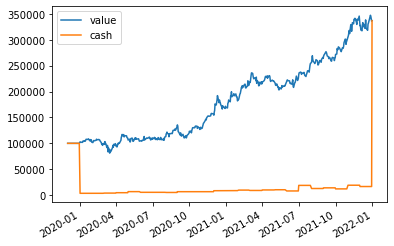

In [4]:
cerebro.analysis_obj.account_timeseries_state.plot()

### 所有曾買進的股票對於策略的貢獻

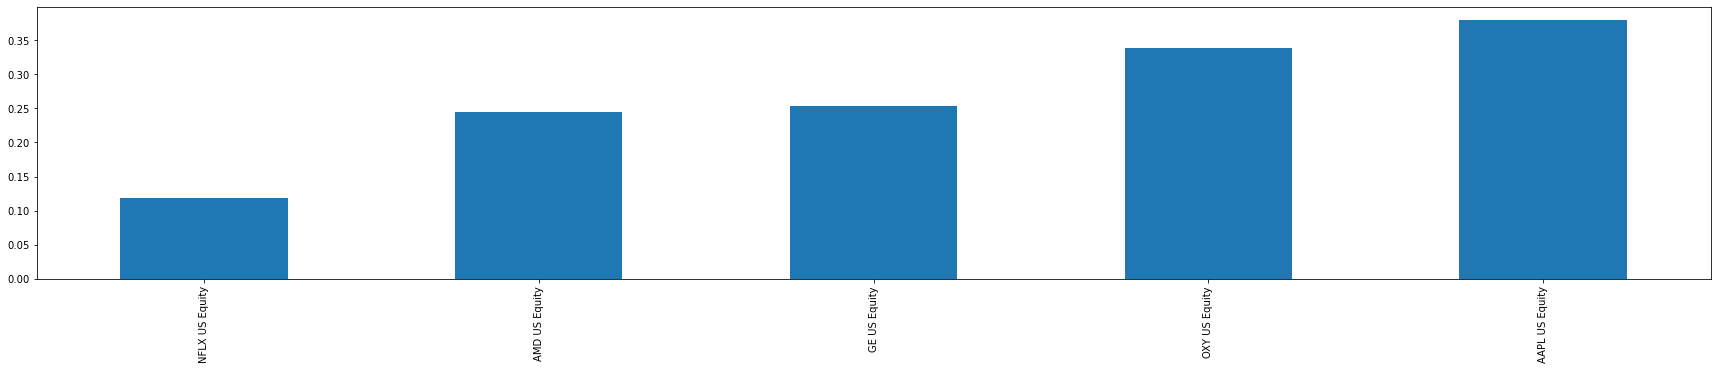

In [5]:
cerebro.analysis_obj.plot_the_contribution_of_individual_tickers()

### 策略日報酬

<AxesSubplot:>

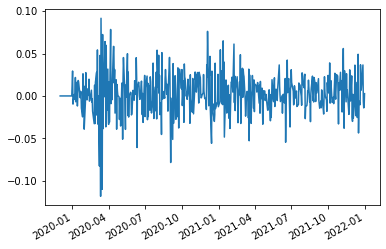

In [6]:
cerebro.analysis_obj.strategy_daily_return().plot()

### 策略滾動(月)波動度

<AxesSubplot:>

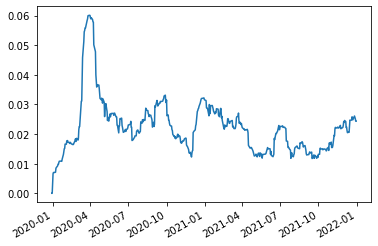

In [8]:
cerebro.analysis_obj.strategy_daily_return().rolling(20).std().plot()

Start date,2019-12-31
End date,2021-12-31
Total months,24
,Backtest
Annual return,83.1%
Cumulative returns,236.8%
Annual volatility,38.5%
Sharpe ratio,1.77
Calmar ratio,3.27
Stability,0.95
Max drawdown,-25.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.23,2020-01-23,2020-03-13,2020-04-14,59
1,15.40,2020-09-01,2020-09-22,2020-11-05,48
2,13.81,2021-03-05,2021-05-12,2021-07-02,86
3,11.54,2020-12-10,2020-12-21,2021-01-14,26
4,7.84,2020-04-16,2020-05-05,2020-08-04,79


Stress Events,mean,min,max
New Normal,0.27%,-11.82%,9.15%


Top 10 long positions of all time,max
OXY US Equity,33.35%
AMD US Equity,20.02%
GE US Equity,14.11%
AAPL US Equity,12.40%
NFLX US Equity,3.35%


Top 10 short positions of all time,max


Top 10 positions of all time,max
OXY US Equity,33.35%
AMD US Equity,20.02%
GE US Equity,14.11%
AAPL US Equity,12.40%
NFLX US Equity,3.35%


C:\Users\chou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: Cannot convert tz-naive timestamps, use tz_localize to localize

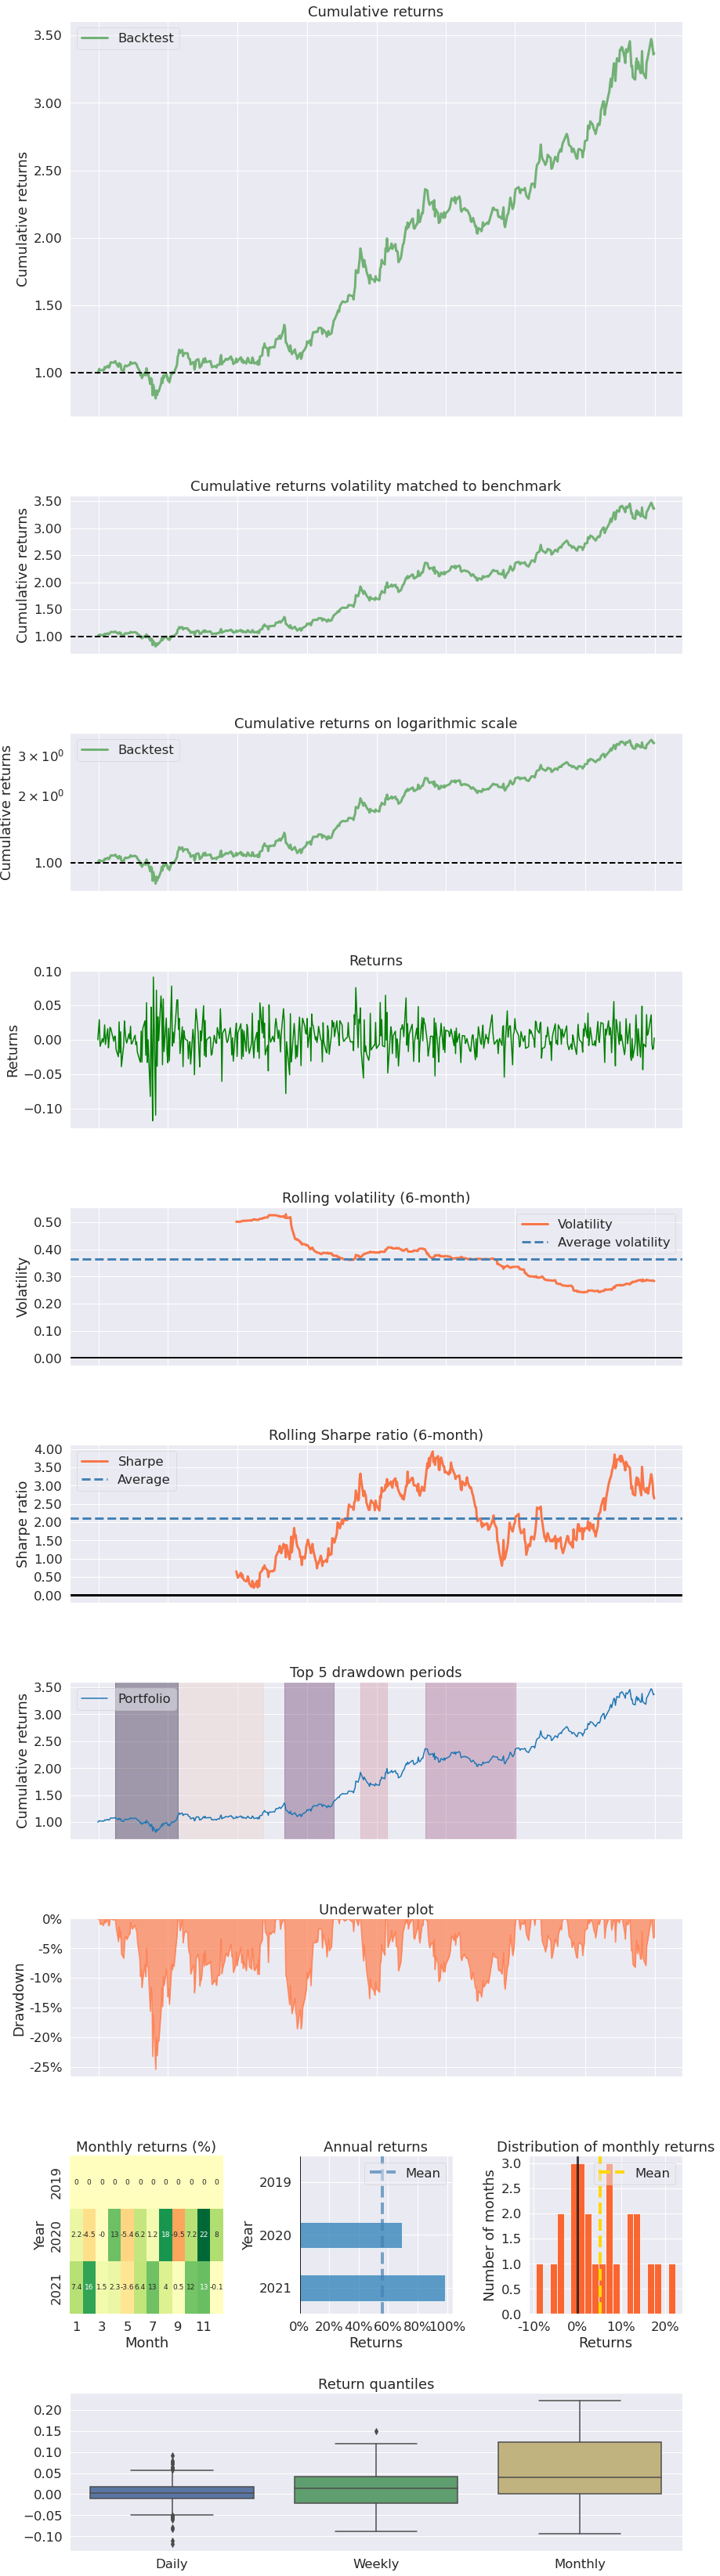

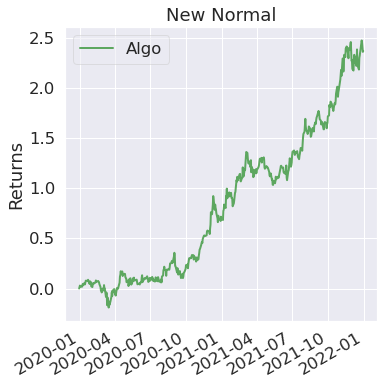

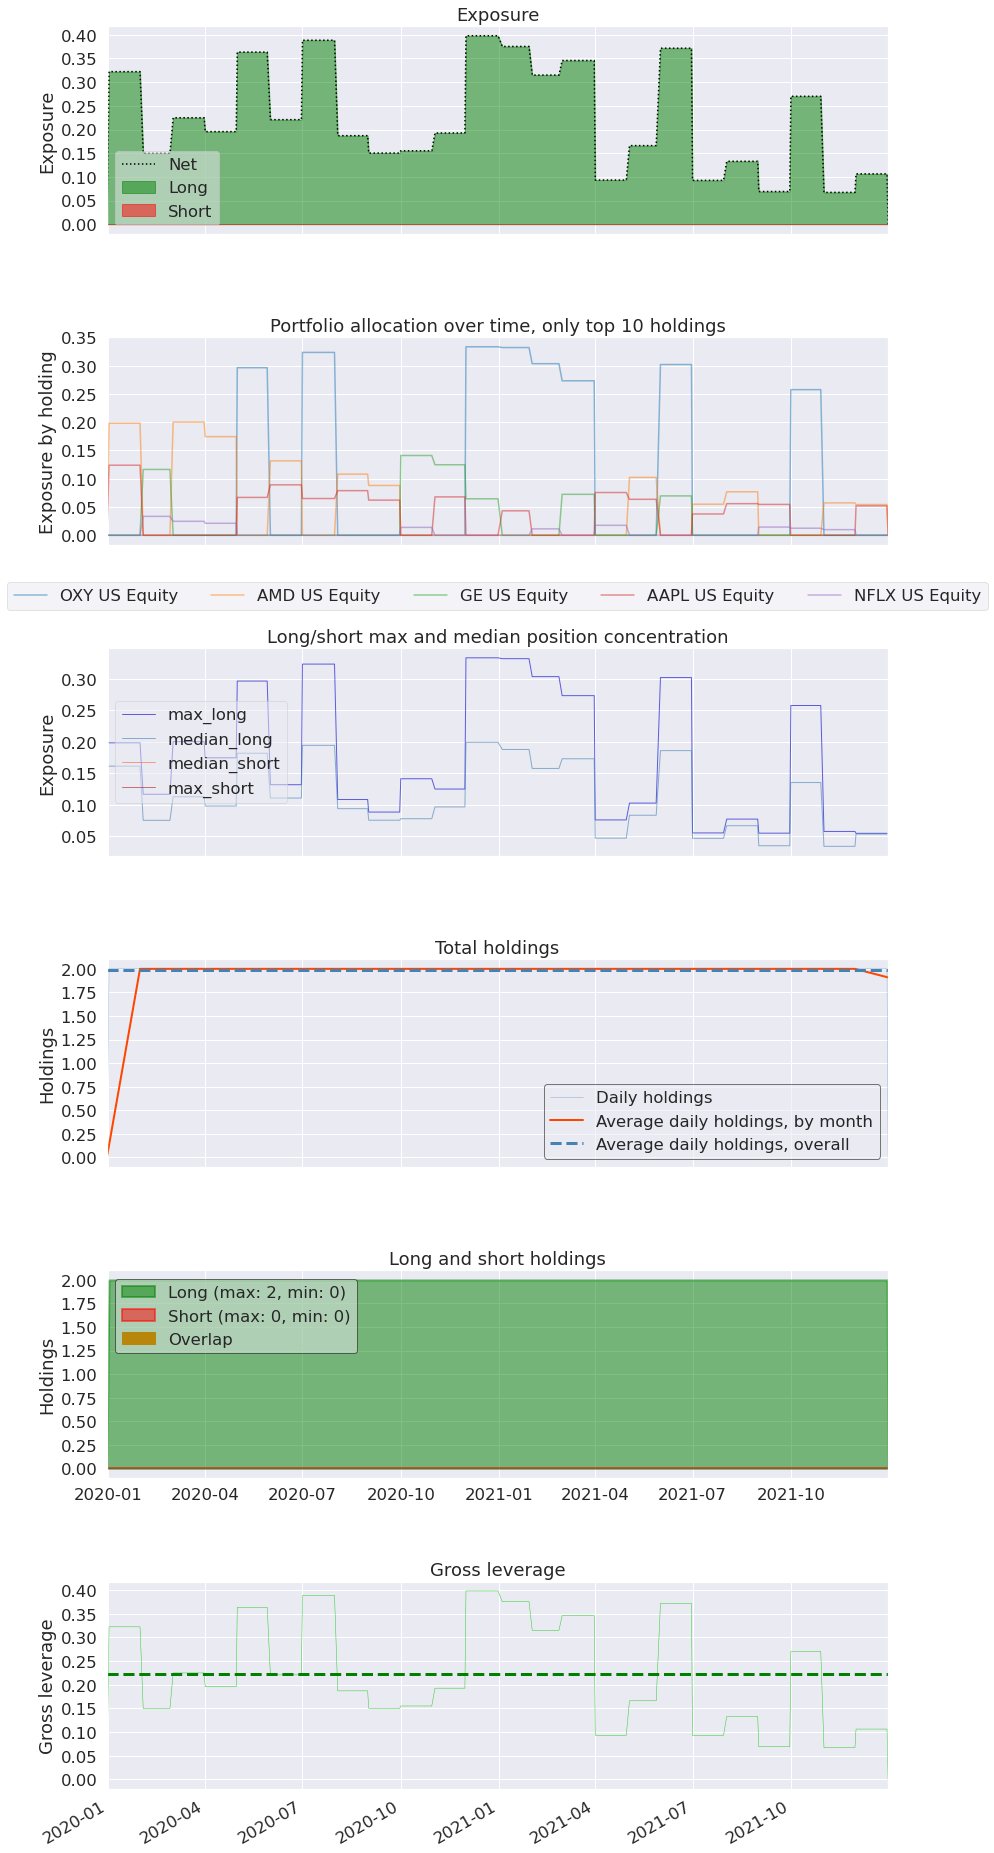

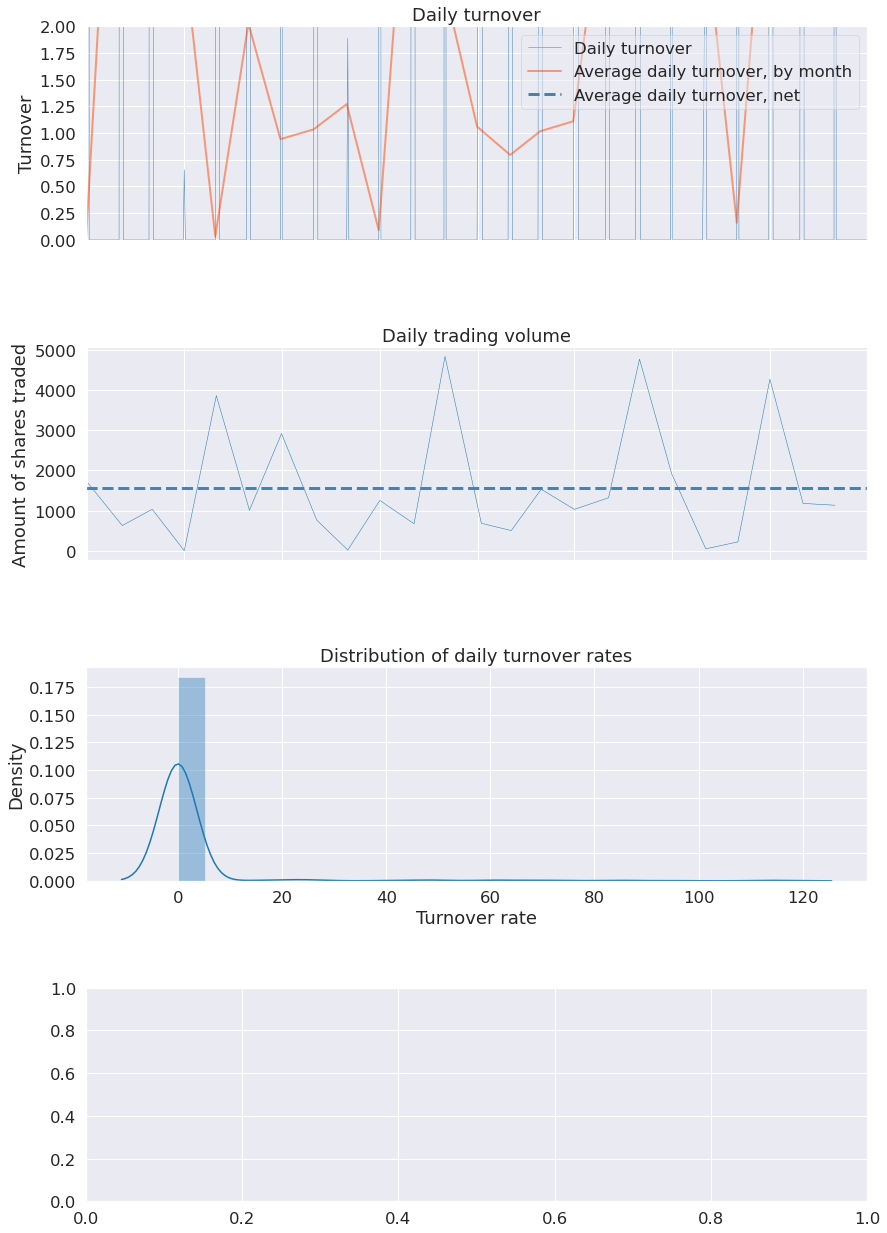

In [13]:
import pyfolio as pf
returns, positions, transactions = cerebro.analysis_obj.setup_for_pyfolio()
# returns = returns[returns.index>strategy_execute_start_date]
# positions = positions[positions.index>strategy_execute_start_date]
# transactions = transactions[transactions.index>strategy_execute_start_date]
pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    round_trips=True)
    
